<a href="https://colab.research.google.com/github/milxss/Medium/blob/main/5_Ways_to_Use_TS_for_Your_Business/Clustering_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate 1 year of sales data for a retail store
index = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
sales = pd.Series(np.random.normal(500, 100, len(index)), index=index)

# Add weekly seasonality
weekly_seasonality = np.tile([0, 0, 0, 0, 0, 1, 1], len(sales) // 7 + 1)[:len(sales)]
sales = sales * weekly_seasonality

# Add some noise to simulate daily fluctuations
noise = np.random.normal(0, 50, len(sales))
sales = sales + noise

# Save the data to a CSV file
sales.to_csv('sales_cluster.csv', header=['sales'])


In [7]:
# Load the data
sales_data = pd.read_csv('sales_cluster.csv', parse_dates=[0], index_col=[0])

In [8]:
sales_data.head()

,sales
2022-01-01,-85.105969
2022-01-02,-66.349710
2022-01-03,-1.840298
2022-01-04,47.659692
2022-01-05,86.096507


In [9]:
# Resample the data to a weekly frequency
weekly_data = sales_data.resample('W').sum()

In [10]:
# Create the model
model = KMeans(n_clusters=4)

# Fit the model
model.fit(weekly_data)

KMeans(n_clusters=4)

In [11]:
# Assign the clusters
clusters = model.predict(weekly_data)

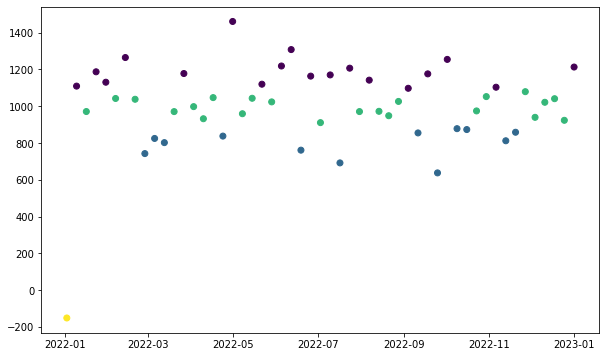

In [13]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(weekly_data.index, weekly_data, c=clusters)
plt.show()